## Question 1:
 
A retail store wants to identify customers who make frequent purchases. Given the dataset below, write a code to:
1.	Group customers by their IDs.
2.	Calculate the total number of purchases per customer.
3.	Identify the top 3 frequent customers.
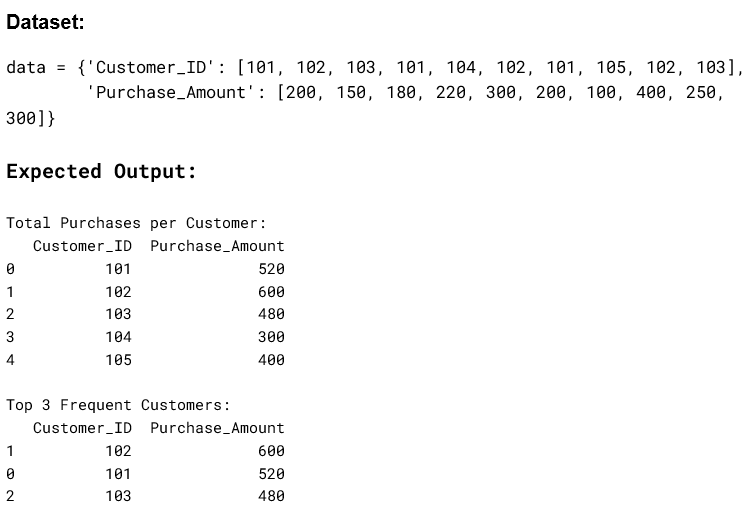

In [19]:
import pandas as pd
import numpy as np

In [20]:
Dataset = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}
Dataset

{'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
 'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}

In [21]:
Customer_ID = [101, 102, 103, 101, 104, 102, 101, 105, 102, 103]
Purchase_Amount = [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]

In [22]:
Dataset = pd.DataFrame(columns = ["Customer_ID", "Purchase_Amount"])

Dataset["Customer_ID"] = Customer_ID
Dataset["Purchase_Amount"] = Purchase_Amount

In [23]:
Dataset = Dataset.groupby("Customer_ID")["Purchase_Amount"].sum().reset_index()

In [24]:
Dataset

,Customer_ID,Purchase_Amount
0,101,520
1,102,600
2,103,480
3,104,300
4,105,400


In [39]:
top3_customers = Dataset.sort_values(by="Purchase_Amount", ascending=False).head(3)

top3_customers

,Customer_ID,Purchase_Amount
1,102,600
0,101,520
2,103,480


**=======================================================================================**

## Question 2:
A company tracks the daily sales of a product over a month. You are tasked with identifying any abnormal sales data using the IQR (Interquartile Range) method.
Dataset (Daily Sales in Units):

data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}

Tasks:
1. Calculate the Q1 (25th percentile) and Q3 (75th percentile).
2. Determine the IQR.
3. Identify the Lower Bound and Upper Bound.
4. Detect and display the outliers.
5. Replace the Outliers with the Median Value.

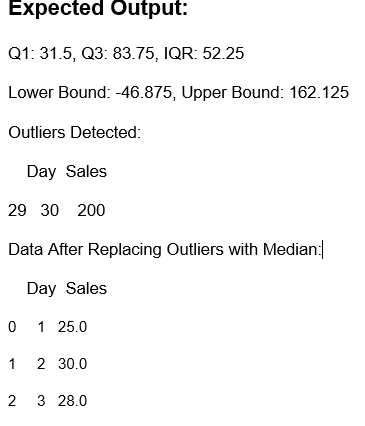

In [57]:
data = {'Day': range(1, 31), 'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}

In [59]:
Dataset = pd.DataFrame(data)

Dataset

,Day,Sales
0,1,25
1,2,30
2,3,28
3,4,45
4,5,55
5,6,60
6,7,22
7,8,80
8,9,95
9,10,120


In [60]:
Q1 = np.percentile(Sales, 25)

Q1

31.5

In [61]:
Q3 = np.percentile(Sales, 75)

Q3

83.75

In [62]:
IQR = Q3 - Q1

IQR

52.25

In [63]:
print("Q1 value is :", Q1)
print("Q3 value is :", Q3)
print("IQR value is :", IQR)

Q1 value is : 31.5
Q3 value is : 83.75
IQR value is : 52.25


In [64]:
Lower_Bound = Q1 - (1.5 * IQR)

Lower_Bound

-46.875

In [65]:
Upper_Bound = Q3 + (1.5 * IQR)

Upper_Bound

162.125

In [66]:
for i in Sales:
    if i > Upper_Bound:
        print("The Outlier is :",i)

The Outlier is : 200


In [68]:
outliers = Dataset[(Dataset['Sales'] < Lower_Bound) | (Dataset['Sales'] > Upper_Bound)]
print("\nOutliers Detected:\n", outliers)


Outliers Detected:
     Day  Sales
29   30    200


In [73]:
median_value = Dataset['Sales'].median()
Dataset['Sales'] = np.where((Dataset['Sales'] < Lower_Bound) | (Dataset['Sales'] > Upper_Bound), median_value, Dataset['Sales'])

print("\nData After Replacing Outliers with Median:\n", Dataset)


Data After Replacing Outliers with Median:
     Day  Sales
0     1   25.0
1     2   30.0
2     3   28.0
3     4   45.0
4     5   55.0
5     6   60.0
6     7   22.0
7     8   80.0
8     9   95.0
9    10  120.0
10   11   33.0
11   12   29.0
12   13   27.0
13   14   35.0
14   15   40.0
15   16   50.0
16   17   85.0
17   18  110.0
18   19  105.0
19   20   92.0
20   21   30.0
21   22   34.0
22   23   31.0
23   24   33.0
24   25   36.0
25   26   42.0
26   27   44.0
27   28   48.0
28   29   90.0
29   30   43.0


**=======================================================================================**

## Question 3:
 
A pharmaceutical company is testing the effectiveness of a new drug to reduce blood pressure. Two groups of patients were selected:
Group 1 (Treatment): Received the drug
Group 2 (Control): Received a placebo
The company wants to check if there is a significant difference in the blood pressure levels between the two groups using an Independent T-Test.
Dataset:
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}

Tasks:
1.	Perform an Independent T-Test.
  
3.	State the null and alternative hypotheses.

5.	Calculate the p-value.

7.	Conclude whether the drug has a significant effect.
  
Expected Output:

T-Statistic: -11.870553692962726

P-Value: 6.008066605173374e-10

Reject the Null Hypothesis: The drug has a significant effect.


In [74]:
data = {'Group': ['Treatment']*10 + ['Control']*10, 'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121, 130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}

In [75]:
Dataset = pd.DataFrame(data)
Dataset

,Group,Blood_Pressure
0,Treatment,120
1,Treatment,115
2,Treatment,118
3,Treatment,123
4,Treatment,122
5,Treatment,119
6,Treatment,124
7,Treatment,117
8,Treatment,116
9,Treatment,121


In [76]:
from scipy.stats import ttest_ind
Treatment = Dataset[Dataset["Group"] == "Treatment"]["Blood_Pressure"]
Control = Dataset[Dataset["Group"] == "Control"]["Blood_Pressure"]

ttest_ind(Treatment, Control)

TtestResult(statistic=-11.870553692962726, pvalue=6.008066605173374e-10, df=18.0)

# Stating Null and Alternative Hypothesis

**Null Hypothesis** - If pvalue is **< 0.05** then there is **no significant difference** in the blood pressure levels between the two groups.

**Alternative Hypothesis** - If pvalue is **> 0.05** then there is a **significant difference** in the blood pressure levels between the two groups.

### Conclusion:
As the pvalue is **<0.05** we **reject** the Null hypothesis so we can conclude there is a **significant difference** in the blood pressure levels between the two groups.

**=======================================================================================**

## Question 4:

GlobalMart is a large retailer conducting advertisement campaigns in different regions. The company spends money on two types of advertisements: TV Ads and Social Media Ads
They want to analyze how these ads influence their sales.
Your task is to calculate the Covariance and Correlation to determine which type of ad has a stronger impact on sales.
Tasks :

1.	Calculate the Covariance between ad budgets and sales to measure the direction of the relationship.

2.	Calculate the Correlation to measure the strength of the relationship.

3.	Determine which type of ad is more effective for increasing sales.

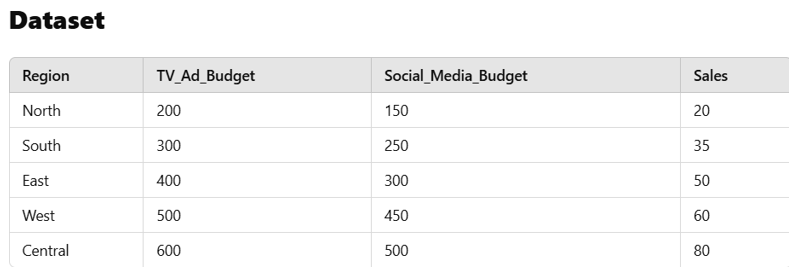


In [1]:
Dataset = {"Region" : ["North", "South", "East", "West", "Central"], "TV_Ad_Budget" : [200, 300, 400, 500, 600],
           "Social_Media_Budget" : [150, 250, 300, 450, 500], "Sales" : [20, 35, 50, 60, 80]}

In [2]:
import pandas as pd
import numpy as np

In [3]:
Dataset = pd.DataFrame(Dataset)

Dataset

,Region,TV_Ad_Budget,Social_Media_Budget,Sales
0,North,200,150,20
1,South,300,250,35
2,East,400,300,50
3,West,500,450,60
4,Central,600,500,80


In [7]:
Dataset["TV_Ad_Budget"].cov(Dataset["Sales"])

3625.0

Dataset["Social_Media_Budget"].cov(Dataset["Sales"])

In [9]:
Dataset["TV_Ad_Budget"].corr(Dataset["Sales"])

0.9958640886279954

In [10]:
Dataset["Social_Media_Budget"].corr(Dataset["Sales"])

0.9724846021568381

### Conclusion:
Analysis shows that both TV Ad Budget (r = 0.996) and Social Media Budget (r = 0.972) have extremely strong positive correlations with Sales. This indicates that higher spending in these areas directly drives sales growth. **TV advertising exhibits a slightly stronger impact** compared to social media, but both are highly effective. The company should prioritize maintaining strong investments in both channels for maximizing sales performance.

**=======================================================================================**

## Question 5:

A company tracks the delivery time (in minutes) for its online orders. You are given the delivery times for 50 orders.

●	Calculate the mean and standard deviation of the delivery times.

●	Plot the Probability Density Function (PDF) to visualize the distribution.
Dataset (Delivery Times in Minutes):
 
[25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160]

You can try implementing this using libraries like numpy, matplotlib, and scipy


In [15]:
Dataset = [25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92, 30, 34, 31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160]

In [16]:
Dataset = np.array(Dataset)

In [18]:
mean = Dataset.mean()

print(" The Mean value of the Delivery times is ", mean)

 The Mean value of the Delivery times is  65.0625


In [19]:
std = Dataset.std()

print(" The Standard Deviation value of the Delivery times is ", std)

 The Standard Deviation value of the Delivery times is  41.718504212759115


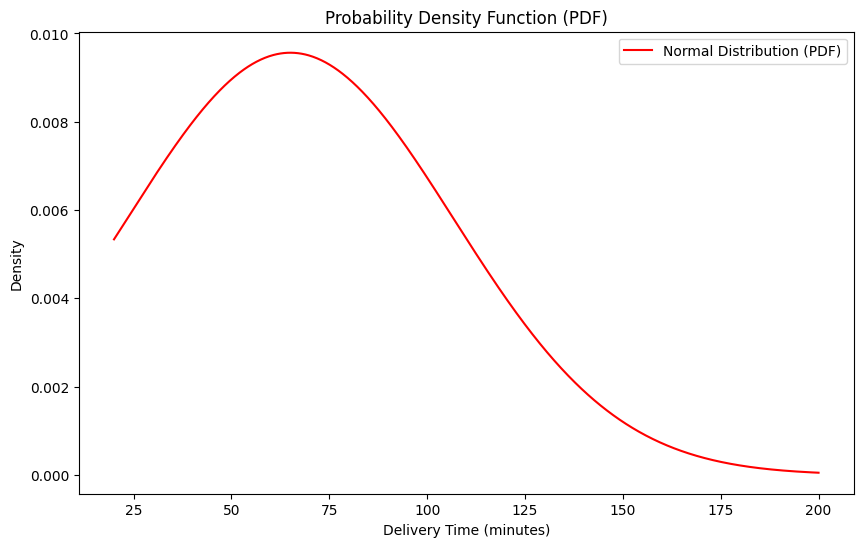

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(min(Dataset), max(Dataset), 1000)
pdf = norm.pdf(x, mean, std)

# Plotting the PDF
plt.figure(figsize=(10,6))
plt.plot(x, pdf, "r-", label= "Normal Distribution (PDF)")

plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF)")
plt.legend()
plt.show()


**=======================================================================================**